In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [6]:
df = pd.read_csv('./DATA/heart.csv')

In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df['target'].unique()

array([1, 0], dtype=int64)

### Exploratory Data Analysis and Visualization

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='target', ylabel='count'>

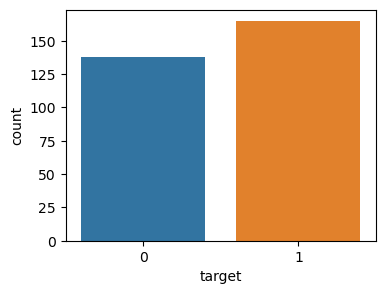

In [14]:

fig = plt.figure(figsize=(4,3))
sns.countplot(data=df,x='target')

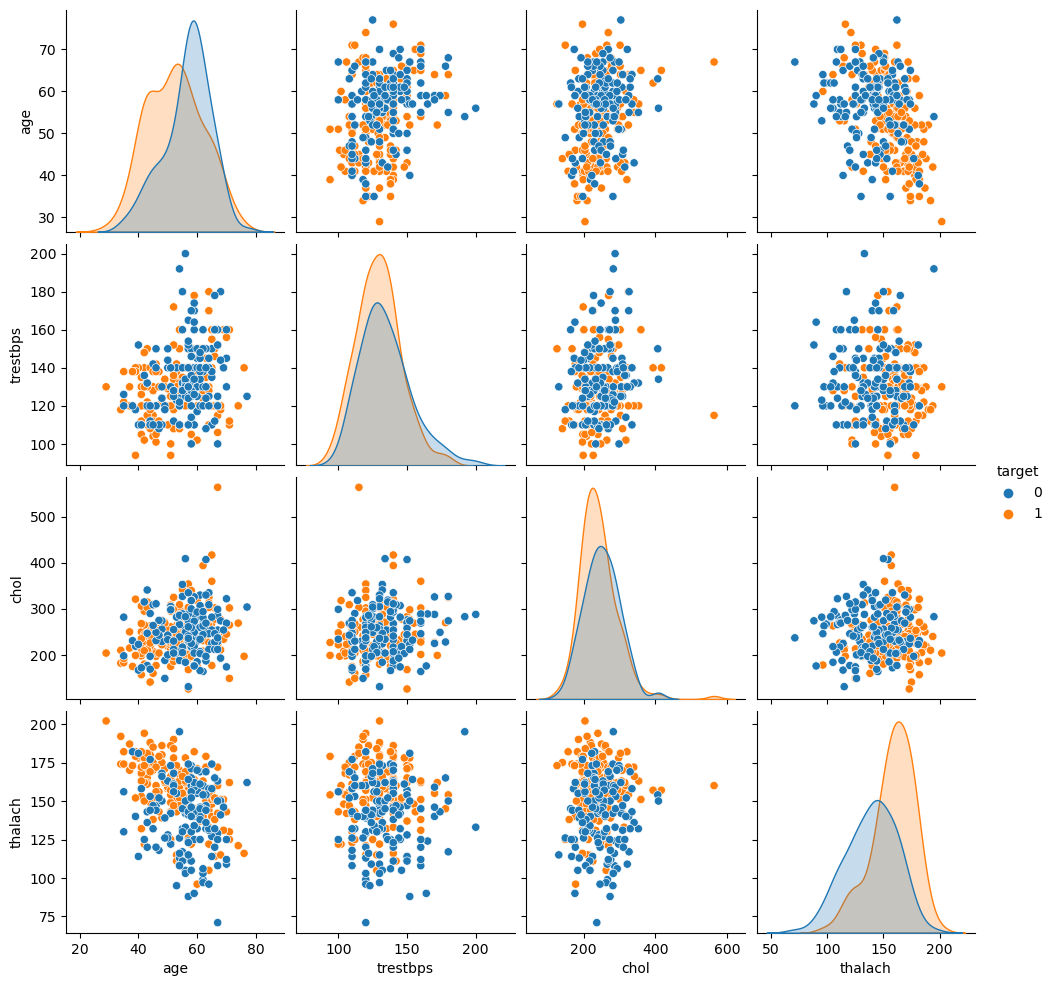

In [15]:

columns = ['age','trestbps', 'chol','thalach','target']
sns.pairplot(data=df[columns],hue='target')

<AxesSubplot:>

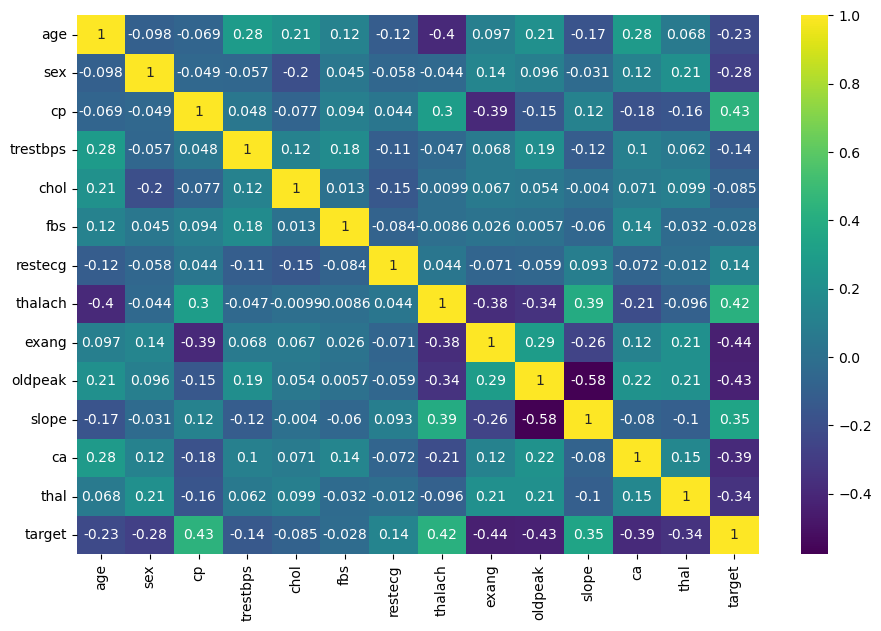

In [16]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [17]:

X=df.drop('target',axis=1)
y=df['target']

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [20]:

scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)


In [22]:
X_test = scaler.transform(X_test)

In [23]:

from sklearn.linear_model import LogisticRegression

In [24]:
log_model = LogisticRegression()

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
penalty=['l1','l2','elasticnet']
l1_ratio = np.linspace(0,1,30)

# C commonly used in other linear models like LogisticRegression etc
#According to documentation, C and alpha are same thing but inversely proportional
#The equivalence between alpha and the regularization parameter of SVM,
#C is given by alpha = 1 / C or alpha = 1 / (n_samples * C),
#depending on the estimator and the exact objective function optimized by t

C = np.logspace(0,10,25) 
param_grid={'penalty':penalty,'C':C,'l1_ratio':l1_ratio}

# this param grid should contain keys according the model on which regularization has to be applied

In [27]:
grid_model = GridSearchCV(estimator=log_model,param_grid=param_grid,cv=6,scoring='neg_mean_squared_error')

In [28]:
grid_model.fit(X_train,y_train)

c:\Users\mrizv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\mrizv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\mrizv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\mrizv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\mrizv\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
c:\Users\mrizv\anaconda3\lib\site-packag

GridSearchCV(cv=6, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+00, 2.61015722e+00, 6.81292069e+00, 1.77827941e+01,
       4.64158883e+01, 1.21152766e+02, 3.16227766e+02, 8.25404185e+02,
       2.15443469e+03, 5.62341325e+03, 1.46779927e+04, 3.83118685e+04,
       1.00000000e+05, 2.61015722e+05, 6.81292069e+05, 1.77827941e+06,
       4.64158883e+06, 1.21152766e+07, 3.162277...
                         'l1_ratio': array([0.        , 0.03448276, 0.06896552, 0.10344828, 0.13793103,
       0.17241379, 0.20689655, 0.24137931, 0.27586207, 0.31034483,
       0.34482759, 0.37931034, 0.4137931 , 0.44827586, 0.48275862,
       0.51724138, 0.55172414, 0.5862069 , 0.62068966, 0.65517241,
       0.68965517, 0.72413793, 0.75862069, 0.79310345, 0.82758621,
       0.86206897, 0.89655172, 0.93103448, 0.96551724, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='neg_mean_squared_error')

In [29]:
grid_model.best_estimator_

LogisticRegression(C=2.610157215682537, l1_ratio=0.0)

In [30]:
grid_model.best_estimator_.coef_

array([[-0.06876118, -0.7655167 ,  0.92282319, -0.27387158, -0.22616355,
         0.04682706,  0.12303453,  0.44605115, -0.43392738, -0.53817598,
         0.39403392, -0.88004666, -0.58929194]])

In [76]:
# help(LogisticRegressionCV)

In [31]:

grid_model.best_estimator_.coef_

array([[-0.06876118, -0.7655167 ,  0.92282319, -0.27387158, -0.22616355,
         0.04682706,  0.12303453,  0.44605115, -0.43392738, -0.53817598,
         0.39403392, -0.88004666, -0.58929194]])

In [34]:
index=X.columns
columns=['weights']
data=grid_model.best_estimator_.coef_

In [38]:
new_df = pd.DataFrame(data=data[0],index=index,columns=columns)
new_df = new_df.sort_values(by='weights',ascending=True)

<AxesSubplot:ylabel='weights'>

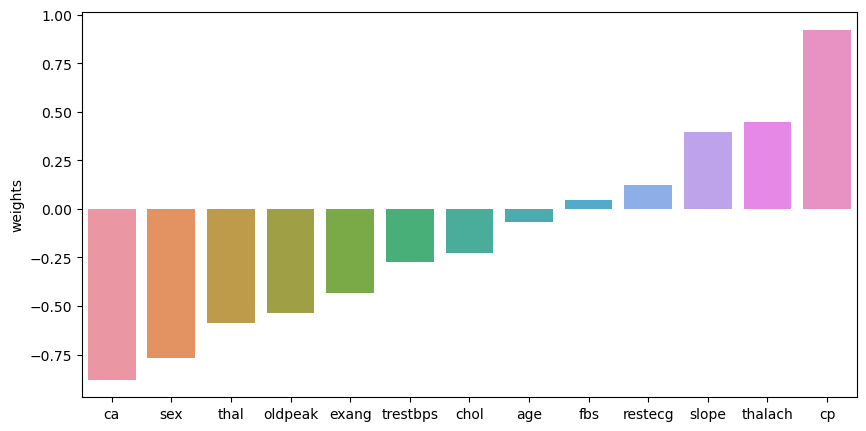

In [40]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x=new_df.index,y=new_df['weights'])

---------

## Model Performance Evaluation

Let's now evaluate your model on the remaining 10% of the data, the test set.

Create the following evaluations:

In [165]:

y_pred = grid_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [166]:
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix, classification_report

In [167]:
confusion_matrix(y_test,y_pred)

array([[12,  3],
       [ 2, 14]], dtype=int64)

C:\Users\mrizv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


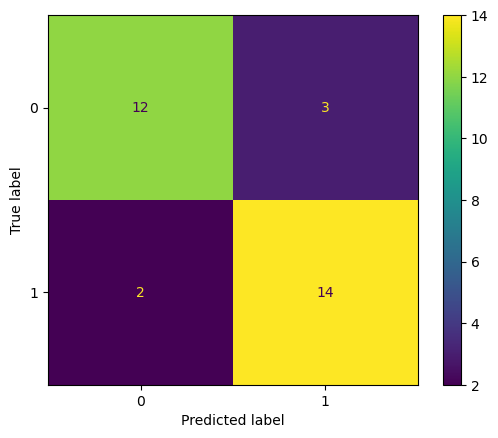

In [168]:

plot_confusion_matrix(grid_model,X_test,y_test)

In [169]:

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Performance Curves


In [170]:

from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

C:\Users\mrizv\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


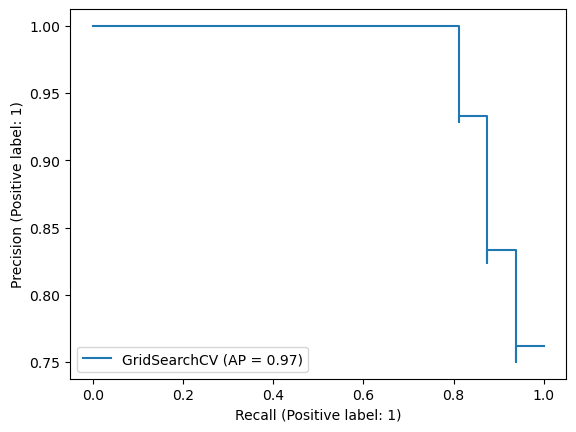

In [172]:
plot_precision_recall_curve(grid_model,X_test,y_test)

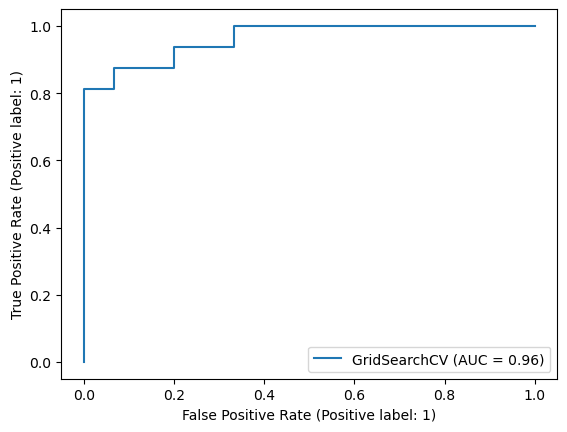

In [176]:

plot_roc_curve(grid_model,X_test,y_test)

In [177]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [179]:

grid_model.predict(patient)

array([0], dtype=int64)

In [180]:

grid_model.predict_proba(patient)

array([[1.00000000e+00, 9.08267145e-25]])

----

## THE END!